In [1]:
include("./AubryAndreModel.jl")
using DifferentialEquations
using Plots
using LinearAlgebra

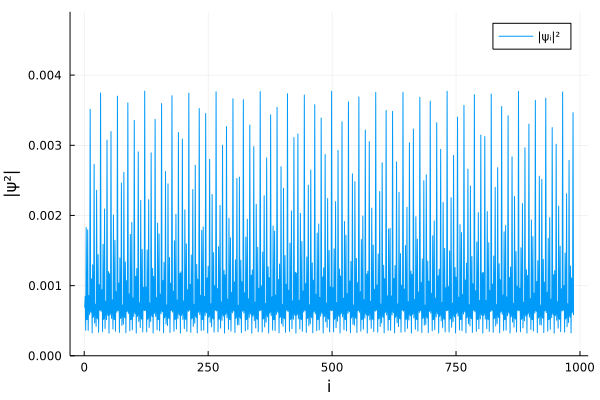

In [2]:
model = AubryAndreModel
matrix = model.hamiltonianMatrix(1.5)
eigenVec = model.eigenVectors(matrix)
plot = model.densityProfileVsLatticeIndexPlot(eigenVec)

In [3]:
u = eigenVec[:,1]
f(u,p,t) =  matrix * u
ψ₀ = zeros(size(u,1))
ψ₀[Int(floor(size(u,1)/2))] = 1
tspan = (0.0, 100.0)

(0.0, 100.0)

In [4]:
prob = ODEProblem(f,ψ₀,tspan)
sol = solve(prob, RK4())

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /home/rodolfo/.julia/packages/SciMLBase/jj8Ix/src/integrator_interface.jl:351


retcode: Unstable
Interpolation: 3rd order Hermite
t: 386-element Vector{Float64}:
  0.0
  0.0007064003550871338
  0.007770403905958471
  0.026415027776735784
  0.05245082215588753
  0.08841316663048077
  0.13449849718707713
  0.19038504853178861
  0.2561655052730982
  0.3315401725812748
  0.4162343142010489
  0.5100858051785805
  0.6121644286034009
  ⋮
 49.38626376690923
 49.50865419872331
 49.63100739988562
 49.75332339791796
 49.875601669815744
 49.99784158785741
 50.120042921356955
 50.24220617586138
 50.36433243053323
 50.48642261807091
 50.6084768703402
 50.73049459202786
u: 386-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 

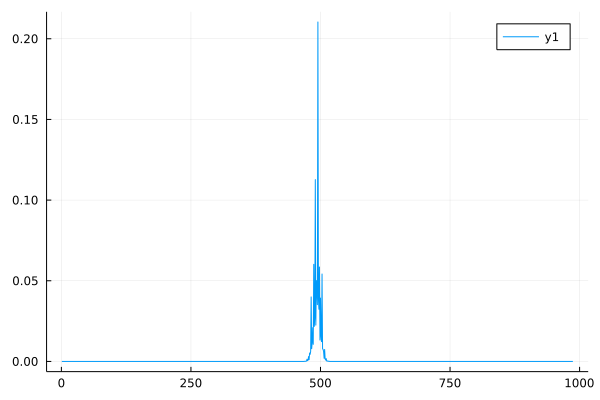

In [5]:
ψi = sol.u[1]
ψf = normalize(sol.u[length(sol.u)])
ψ² = map(x -> x^2, ψf)
latticeIndex = 1:size(ψ²,1)
Plots.plot(latticeIndex, ψ²)